# Stacking

Stacking, ou empilhamento, é uma técnica de aprendizado por comitê que agrupa o resultado predito por N modelos para um mesmo problema e utiliza esses resultados como entrada para um novo modelo, que prediz o resultado final.

## Exemplo

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification, make_regression

from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.ensemble import StackingClassifier, StackingRegressor

### Classificação

In [13]:
#Gerando dados
X, y = make_classification(n_samples = 1000, n_features = 5, n_informative=3, n_classes=3)
X_train, X_test, y_train, y_test = X[:800],X[800:],y[:800],y[800:]

In [27]:
#Criando modelos 
svc = SVC(kernel='linear')

dtc = DecisionTreeClassifier()

lr = LogisticRegression()

In [40]:
#Avaliando modelos separadamente para comparar com o stacking
svc.fit(X_train, y_train)
svc_sc = svc.score(X_test, y_test)

dtc.fit(X_train, y_train)
dtc_sc = dtc.score(X_test, y_test)

print('SVC - Score: ', svc_sc)
print('Decision tree - Score: ', dtc_sc)

SVC - Score:  0.635
Decision tree - Score:  0.815


In [48]:
#gerando lista dos modelos
estimators = [('svc',svc),
             ('decision_tree',dtc)]

#Criando classificador por empilhamento

stacking_clf = StackingClassifier(estimators = estimators, #modelos definidos acima
                                 final_estimator = lr #modelo logisticRegression
                                 )

stacking_clf.fit(X_train, y_train)
stck_sc = stacking_clf.score(X_test, y_test)

print('Stacking - Score: ', stck_sc)

Stacking - Score:  0.83


### Regressão

In [50]:
#gerando dados
X, y = make_regression(n_samples = 1000, n_features = 5, shuffle = True)
X_train, X_test, y_train, y_test = X[:800],X[800:],y[:800],y[800:]

In [53]:
#Criando modelos
svr = SVR(kernel='rbf')

dtr = DecisionTreeRegressor()

lr = LinearRegression()

In [54]:
#Analisando modelos individualmente
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
svr_sc = svr.score(X_test, y_test)

dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)
dtr_sc = dtr.score(X_test, y_test)

print('SVR - Score: ', svr_sc)
print('Decision tree - Score: ', dtr_sc)

SVR - Score:  0.46899668967449015
Decision tree - Score:  0.8681407987639742


In [56]:
#Criando empilhamento

estimators = [('svr', svr),
             ('decision_tree', dtr)]

stacking_reg = StackingRegressor(estimators = estimators, #lista de modelos
                                final_estimator = lr)

stacking_reg.fit(X_train, y_train)
stck_pred = stacking_reg.predict(X_test)
stck_sc = stacking_reg.score(X_test, y_test)

print('Stacking regressor - Score: ', stck_sc)

Stacking regressor - Score:  0.8914710877139218


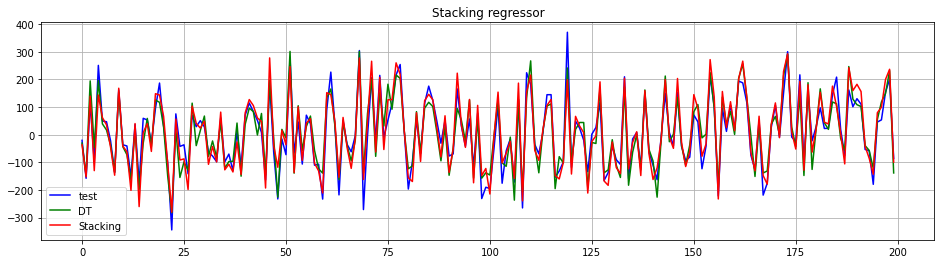

In [61]:
plt.figure(figsize=(16,4))
plt.title("Stacking regressor")
plt.plot(y_test, color='blue', label='test')
#plt.plot(svr_pred, color='grey',label='SVR')
plt.plot(dtr_pred, color='green', label='DT')
plt.plot(stck_pred, color='red', label='Stacking')

plt.legend()
plt.grid()
plt.show()